# 波士頓房價預測 [數據集](https://archive.ics.uci.edu/ml/datasets/Housing)


1. CRIM: 某城鎮犯罪率.
2. ZN: 住宅用地區塊比例 over 25,000 sq.ft.
3. INDUS: 商業用地，非零售 acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 
5. NOX: NO濃度 (parts per 10 million).
6. RM: 每戶平均房間數.
7. AGE: proportion of owner-occupied units built prior to 1940. 
8. DIS: 到波士頓五個就業區的權衡距離. 
9. RAD: 快速道路方便指數.
10. TAX: 稅金比 10,000鎂.
11. PTRATIO: 城鎮老師學生比.
12. B: 1000(Bk 0.63)^2 黑人比例. 
13. LSTAT: 低收入比例.
14. MEDV: 房價中位數 1000鎂.

In [31]:
import numpy
from pandas import read_csv
import matplotlib.pyplot as plt
from keras.layers import Dropout 
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
df = read_csv("dataset/housing.data", header=None, delim_whitespace=True,
             names = ['Crim', 'Zn', 'Indus', 'Chas', 'Nox', 'Rm', 'Age', 
                       'Dis', 'Rad', 'Tax', 'Ptratio', 'B', 'Lstat', 'Medv'])
df.head()

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
df.shape

(506, 14)

In [9]:
dataset = df.values
# split into input and output variables
X = dataset[:,0:13].astype(float)
Y = dataset[:,13].astype(int)

## 建模
#### Q : 為什麼最後一層沒使用activation? 試試看加上後數據會怎樣？以及為什麼？

In [38]:
seed = 87
numpy.random.seed(seed)

def baseline_model():
  # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu' ))
    model.add(Dropout(0.2))
    model.add(Dense(16,kernel_initializer='normal',activation='relu' ))
    model.add(Dense(1,kernel_initializer='normal'))
  # Compile model
    model.compile(loss='mean_squared_error' , optimizer='adam' )
    return model

### Metric R2 度量子

In [39]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=8, verbose=0)
kfold = KFold(n_splits=5, shuffle=True,random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold, scoring='r2')
print("Baseline: %.4f (%.4f) R2 Score" % (results.mean(), results.std()))

Baseline: 0.5998 (0.1229) R2 Score


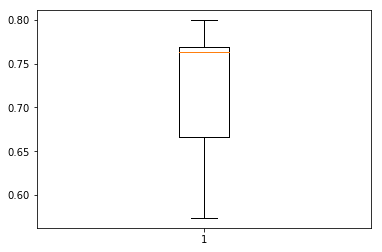

In [35]:
plt.boxplot(results)
plt.show()